Nama : Fauzan Pradana <br>
Kelas : TI 3G <br>
NIM : 2041720224 <br>
No Absen : 10 <br>

# Kuis 1 Machine Learning

#### Soal
1. Buat sebuah prediksi harga rumah bedasarkan data yang diberikan. Penentu variabel yang tepat perlu dilakukan dilakukan dengan melihat kolerasi setiap variabel yang sesuai! Luaran nomor ini adalah bentuk grafik regresi linier tunggal dan nilai konstanta yang berhasil di generate serta tinggkat error yang dihitung melalui selisih data y prediksi dan y training.

## Data Preparation

In [62]:
# library import
import pandas as pd
import numpy as np

In [63]:
# import data
df = pd.read_csv('dataset/train.csv');
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [64]:
# cek data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
# pemahaman terhadap data
# ukuran data
df.shape

# info data
df.info()

# deskripsi data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Soal Nomor 1

Pada soal nomor 1, saya menjadikan **harga rumah sebagai nilai y** nya. Sehingga saya akan mencari atribut yang paling memengaruhi nilai pada atribut tersebut (x)

In [66]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

### Mencari X

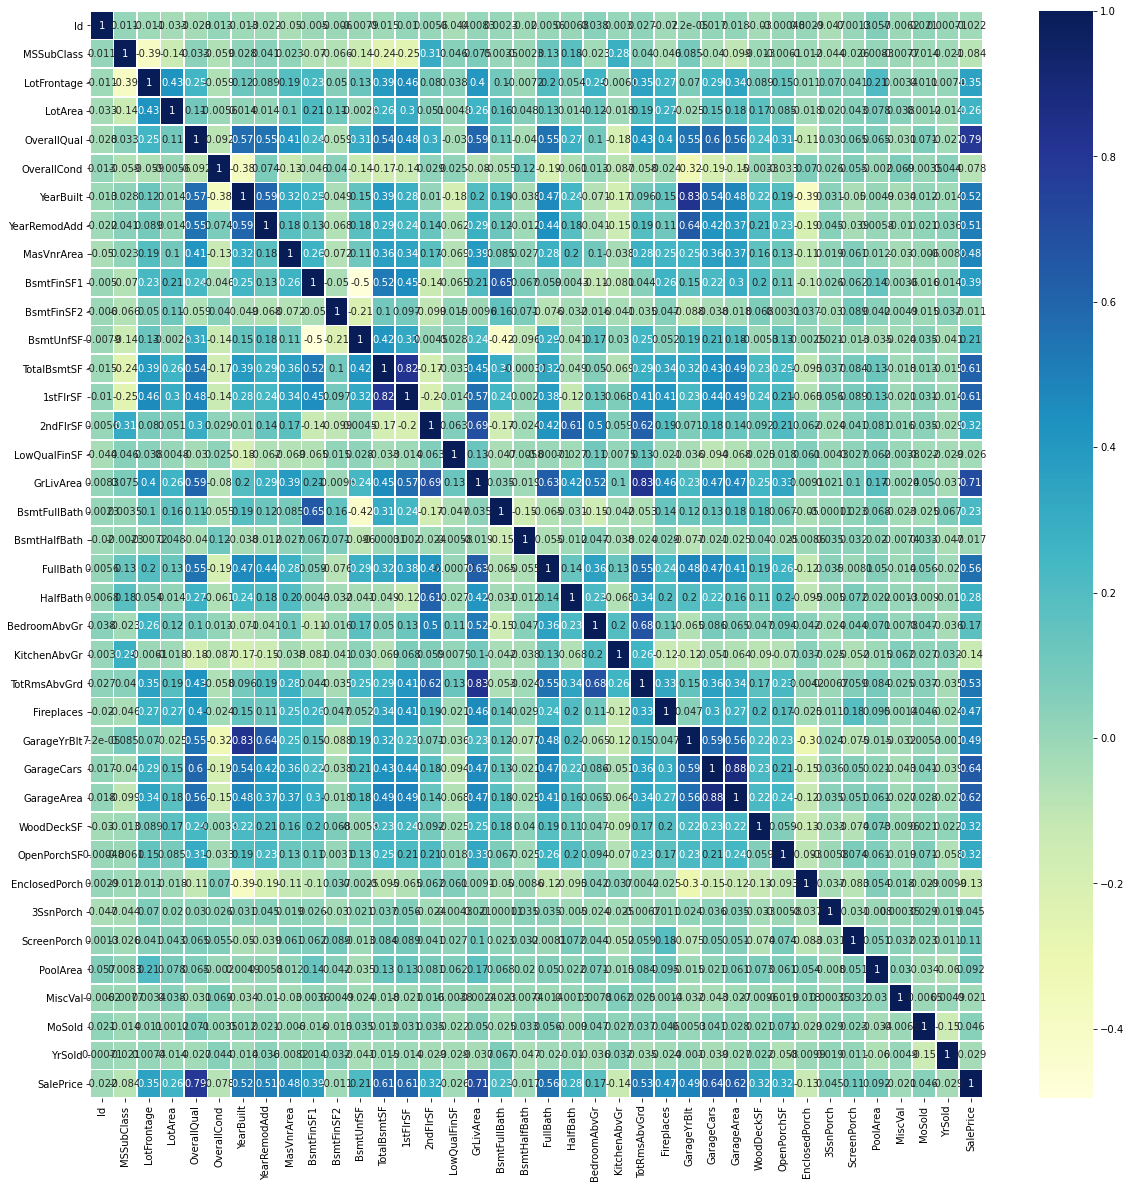

In [68]:
fg, ax = plt.subplots(figsize=(20,20)) 

sns.heatmap(df.corr(), cmap='YlGnBu', annot = True, linewidths=.8, ax=ax)
plt.show()

#### Nilai X ditentukan
Berdasarkan heatmap di atas, atribut yang digunakan sebagai nilai X adalah **OverallQual**, yaitu merupakan variabel yang memiliki hubungan paling tinggi dengan SalePrice (sebesar 0,79)

### Visualisasi Data

C:\Users\LEGION\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


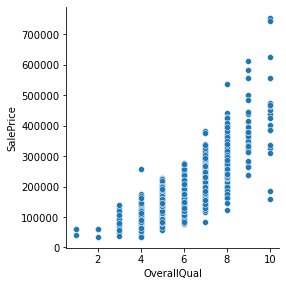

In [37]:
# operasi visualisasi
sns.pairplot(df, x_vars=['OverallQual'],  
             y_vars='SalePrice', size=4, aspect=1, kind='scatter')
plt.show()

In [43]:
df_map = df[['SalePrice', 'OverallQual']]
df_map

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8
...,...,...
1455,175000,6
1456,210000,6
1457,266500,7
1458,142125,5


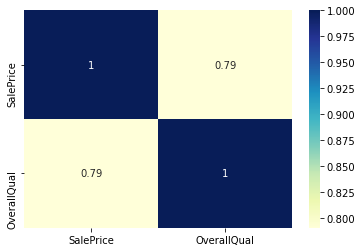

In [44]:
sns.heatmap(df_map.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Regresi

In [45]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = df['OverallQual']
y = df['SalePrice']

In [46]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [47]:
# hasil training dtaset
X_train
y_train

210      98000
318     260000
239     113000
986     117000
1416    122500
         ...  
1009    102000
802     189000
53      385000
350     318061
79      110000
Name: SalePrice, Length: 1021, dtype: int64

In [48]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [49]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const         -90393.057758
OverallQual    44464.048878
dtype: float64

In [50]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1657.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):          6.96e-216
Time:                        04:20:22   Log-Likelihood:                -12471.
No. Observations:                1021   AIC:                         2.495e+04
Df Residuals:                    1019   BIC:                         2.495e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.039e+04   6826.149    -13.242      0.000   -1.04e+05    -7.7e+04
OverallQual  4.446e+04   1092.236     40.709      0.000    4.23e+04    4.66e+04
==============================================================================
Omnibus:                      443.765   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5162.674
Skew:                           1.670   Prob(JB):                         0.00
Kurtosis:                      13.498   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

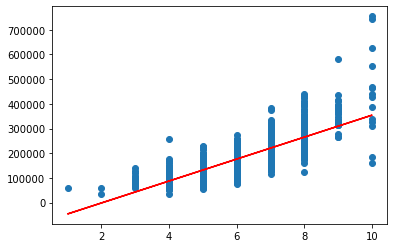

In [52]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, -90393.057758 + 44464.048878*X_train, 'r')
plt.show()

In [53]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

C:\Users\LEGION\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


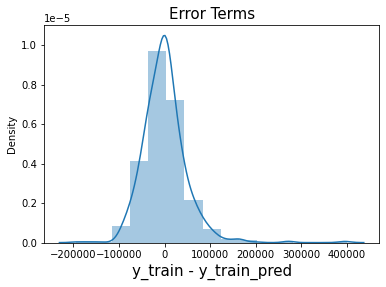

In [54]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

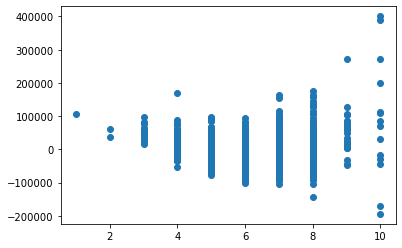

In [55]:
plt.scatter(X_train,res)
plt.show()

In [56]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

1436     87463.137753
57      220855.284386
780     220855.284386
382     220855.284386
1170    176391.235509
dtype: float64

In [57]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.6389416259690259

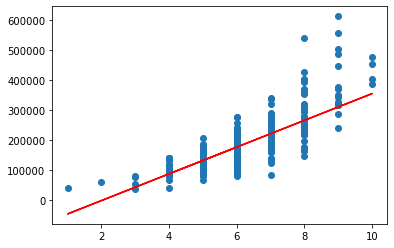

In [58]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

### Kesimpulan Nomor 1
Variabel X = OverallQual
Nilai Konstanta yang digenerate adalah = -90393.057758

## Soal Nomor 2

In [138]:
my_df = df[['SalePrice', 'OverallQual']]
my_df

,SalePrice,OverallQual
0,208500,6
1,181500,5
2,223500,6
3,140000,6
4,250000,7
...,...,...
1455,175000,5
1456,210000,5
1457,266500,6
1458,142125,4


In [139]:
# missing value
mv = my_df['OverallQual'].isnull().sum()
mv

0

In [159]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

df['MSZoning'] = encode.fit_transform(df['MSZoning'])
df['Street'] = encode.fit_transform(df['Street'])
df['LotShape'] = encode.fit_transform(df['LotShape'])
df['LandContour'] = encode.fit_transform(df['LandContour'])
df['Utilities'] = encode.fit_transform(df['Utilities'])
df['LotConfig'] = encode.fit_transform(df['LotConfig'])
df['LandSlope'] = encode.fit_transform(df['LandSlope'])
df['Neighborhood'] = encode.fit_transform(df['Neighborhood'])
df['Condition1'] = encode.fit_transform(df['Condition1'])
df['Condition2'] = encode.fit_transform(df['Condition2'])
df['BldgType'] = encode.fit_transform(df['BldgType'])
df['HouseStyle'] = encode.fit_transform(df['HouseStyle'])
df['RoofStyle'] = encode.fit_transform(df['RoofStyle'])
df['RoofMatl'] = encode.fit_transform(df['RoofMatl'])
df['Exterior1st'] = encode.fit_transform(df['Exterior1st'])
df['Exterior2nd'] = encode.fit_transform(df['Exterior2nd'])
df['MasVnrType'] = encode.fit_transform(df['MasVnrType'])
df['ExterQual'] = encode.fit_transform(df['ExterQual'])
df['ExterCond'] = encode.fit_transform(df['ExterCond'])
df['Foundation'] = encode.fit_transform(df['Foundation'])
df['BsmtQual'] = encode.fit_transform(df['BsmtQual'])
df['BsmtCond'] = encode.fit_transform(df['BsmtCond'])
df['BsmtExposure'] = encode.fit_transform(df['BsmtExposure'])
df['BsmtFinType1'] = encode.fit_transform(df['BsmtFinType1'])
df['BsmtFinType2'] = encode.fit_transform(df['BsmtFinType2'])
df['Heating'] = encode.fit_transform(df['Heating'])
df['HeatingQC'] = encode.fit_transform(df['HeatingQC'])
df['CentralAir'] = encode.fit_transform(df['CentralAir'])
df['Electrical'] = encode.fit_transform(df['Electrical'])
df['KitchenQual'] = encode.fit_transform(df['KitchenQual'])
df['Functional'] = encode.fit_transform(df['Functional'])
df['FireplaceQu'] = encode.fit_transform(df['FireplaceQu'])
df['GarageType'] = encode.fit_transform(df['GarageType'])
df['GarageFinish'] = encode.fit_transform(df['GarageFinish'])
df['GarageQual'] = encode.fit_transform(df['GarageQual'])
df['GarageCond'] = encode.fit_transform(df['GarageCond'])
df['PavedDrive'] = encode.fit_transform(df['PavedDrive'])
df['SaleType'] = encode.fit_transform(df['SaleType'])
df['SaleCondition'] = encode.fit_transform(df['SaleCondition'])

In [156]:
# Memisahkan fitur dengan label
X = my_df.iloc[:,:-1]
y = my_df.iloc[:,-1]

In [157]:
# Split data training dan testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

In [158]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Inisiasi obyek MultinomialNB
gnb = GaussianNB()

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5048923679060665
Hasil akurasi data test: 0.502283105022831


## Soal Nomor 3

### Menentukan Jenis - jenis zona

In [131]:
zone_set = set(df['MSZoning'])
zone_set
zone_list = list(zone_set)
zone_list

['FV', 'RL', 'RM', 'RH', 'C (all)']

In [75]:
df['MSZoning'].count()

1460

In [99]:
df_FV = df[(df.MSZoning == "FV")]
count_row_FV = df_FV.shape[0]  # gives number of row count
count_row_FV

65

In [100]:
df_RH = df[(df.MSZoning == "RH")]
count_row_RH = df_RH.shape[0]  # gives number of row count
count_row_RH

16

In [102]:
df_RL = df[(df.MSZoning == "RL")]
count_row_RL = df_RL.shape[0]  # gives number of row count
count_row_RL

1151

In [103]:
df_RM = df[(df.MSZoning == "RM")]
count_row_RM = df_RM.shape[0]  # gives number of row count
count_row_RM

218

In [104]:
df_c = df[(df.MSZoning == "C (all)")]
count_row_c = df_c.shape[0]  # gives number of row count
count_row_c

10

In [134]:
nilai = [count_row_FV, count_row_RL, count_row_RM, count_row_RH, count_row_c]
# ['FV', 'RL', 'RM', 'RH', 'C (all)']
nilai

[65, 1151, 218, 16, 10]

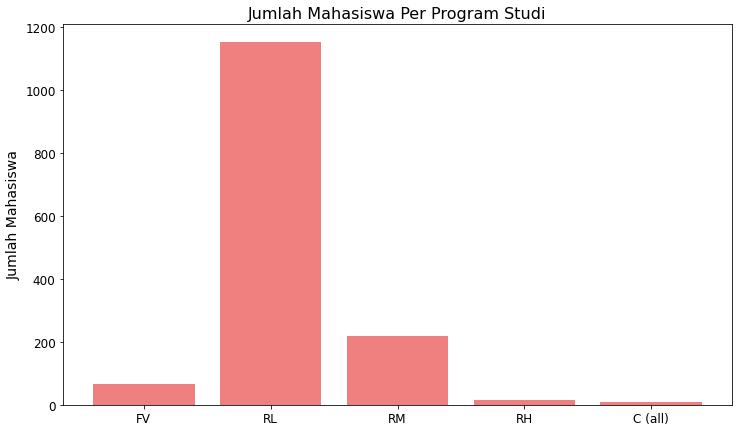

In [136]:
plt.figure(figsize=(12,7))
plt.bar(zone_list, nilai, color='lightcoral')

plt.title('Jumlah Mahasiswa Per Program Studi', size=16)
plt.ylabel('Jumlah Mahasiswa', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()